In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [10]:
df = pd.read_csv("Ecommerce Customers.csv")

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [23]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

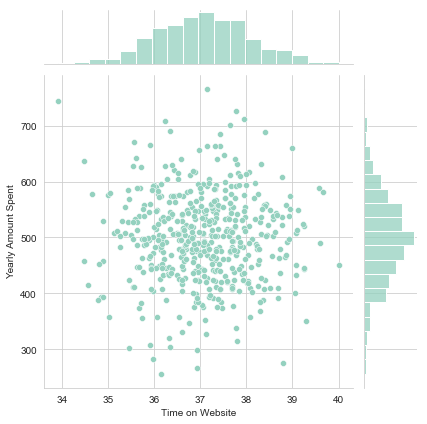

In [27]:
#Time on  and Yearly Amount Spent
sns.jointplot( x='Time on Website', y= 'Yearly Amount Spent', data=df)

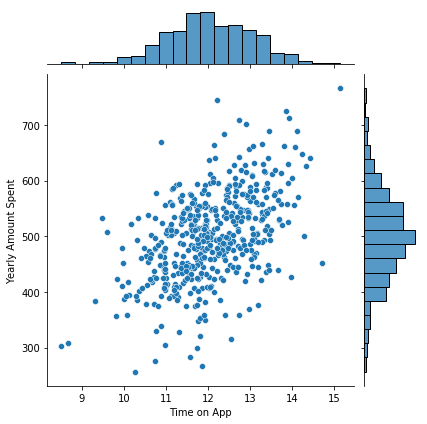

In [17]:
#Time on App and Yearly Amount Spent
sns.jointplot( x=df['Time on App'], y= df['Yearly Amount Spent'], data=df)

# Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

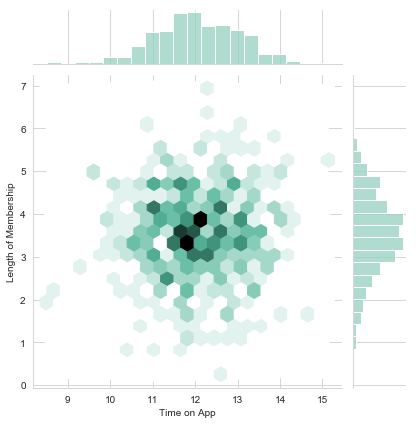

In [32]:
sns.jointplot( x='Time on App', y= 'Length of Membership',kind='hex', data=df)

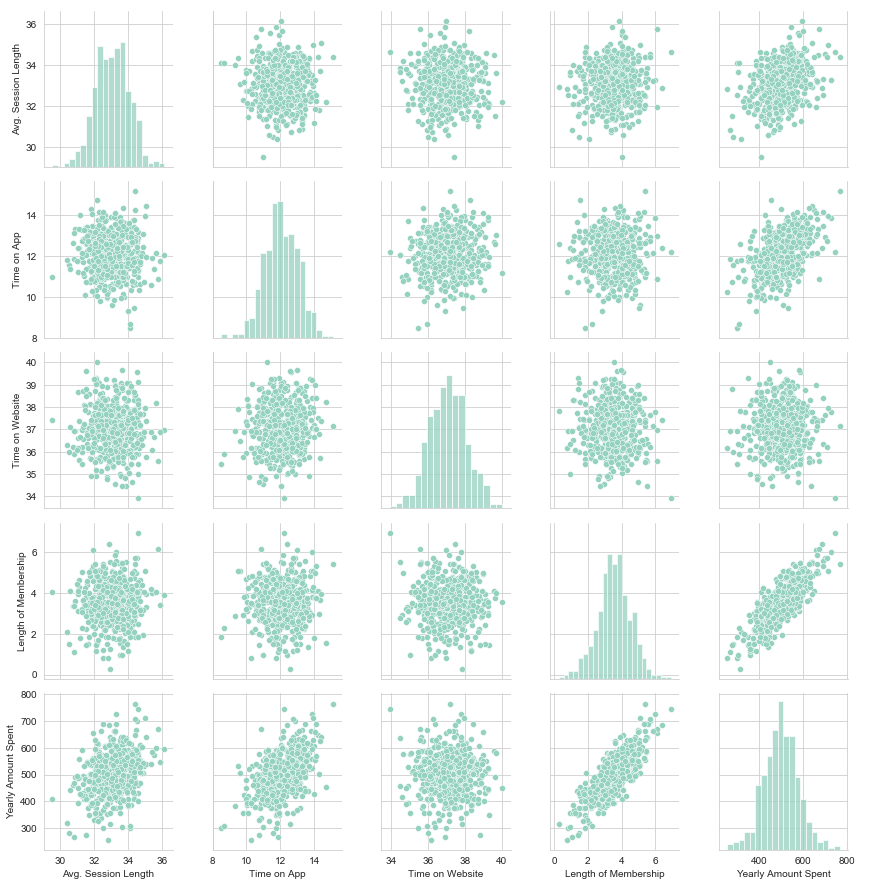

In [34]:
sns.pairplot(df)

In [35]:
#Lenght of Membership is the most correlated with Yearly Amount Spent

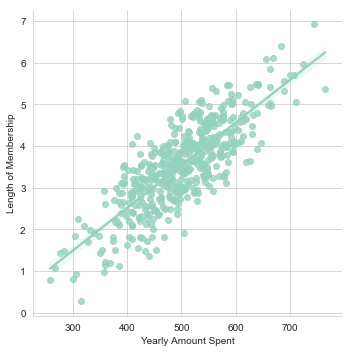

In [37]:
# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=df)

In [39]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [40]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [41]:
y = df['Yearly Amount Spent']

In [46]:
# X.head()
# y.head()

In [ ]:
# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [47]:
from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.30,random_state = 101)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()

# Train/fit lm on the training data.

In [52]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

# Predicting the test data

In [55]:
# Use lm.predict() to predict off the X_test set of the data.

predictions = lm.predict(X_test)

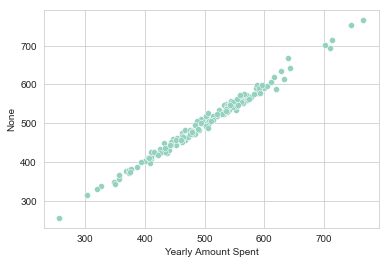

In [61]:
# Create a scatterplot of the real test values versus the predicted values.
sns.scatterplot(x=y_test, y=predictions)

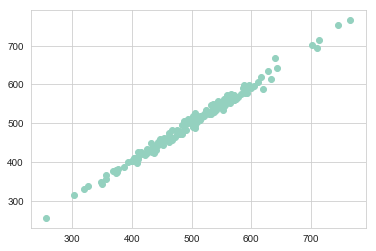

In [62]:
plt.scatter(x=y_test, y=predictions)

# Evaluating the Model

In [65]:
# Calculate the Mean Absolute Error, 
# Mean Squared Error, and 
# the Root Mean Squared Error. 

In [66]:
from sklearn import metrics

In [99]:
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print( 'MSE :' , metrics.mean_squared_error(y_test, predictions))
print('RMAE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 7.228148653430838
MSE : 79.81305165097461
RMAE : 8.933815066978642


In [101]:
# For R Squared 

metrics.explained_variance_score(y_test, predictions)

0.9890771231889606

In [ ]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

C:\Users\bamidele.ajamu\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


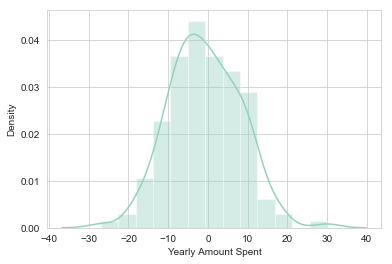

In [93]:
sns.distplot(y_test - predictions)

(array([ 1.,  5., 15., 34., 36., 27., 25.,  5.,  1.,  1.]),
 array([-26.95573072, -21.26030045, -15.56487019,  -9.86943992,
         -4.17400966,   1.5214206 ,   7.21685087,  12.91228113,
         18.6077114 ,  24.30314166,  29.99857192]),
 <a list of 10 Patch objects>)

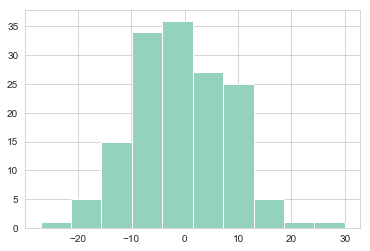

In [91]:
plt.hist(y_test - predictions)

In [96]:
cdt = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient of Parameters"])

In [98]:
cdt

,Coefficient of Parameters
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
